<a href="https://colab.research.google.com/github/mohit27-maker/pwAssigment/blob/main/EDA_%7C_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/BIKE DETAILS.csv

In [ ]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
print(df.head(10))

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [ ]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
print(df.shape)
print(df.isnull().sum())

(1061, 7)
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


Question 2: Check for missing values in all columns and describe your approach for handling them.

 = here is the description for the missing value approach -
   so we can see that total we have 1061 rows in our dataset,for missing rows there are 435 in ex_showroom_price . we can say that missing value is approx upto 37% of the whole data.

   *now for handling the missing value we have some options*
   1. Drop rows with missing values
    - we can drop the rows with missing values but then we have almost 37-40% loss in data , so its not the appropiate way of dealing with missing values.

   2. Fill missing price with central tandency
   - if price distribution is normal we can fill it with mean
   - if price distribution in skewed(outlier) then we can use median
   - or if we want the most comman price we use mode

   3. Group wise imputation
   - in bikes we know that the price of the bike is heavily depends on the Brand and the model , so we can fill missing prices within each groups

= so the best approach for filling the misiing price is to use Groupwise imputation on the ex_showroom_price depends on the bike,mmodel and year.

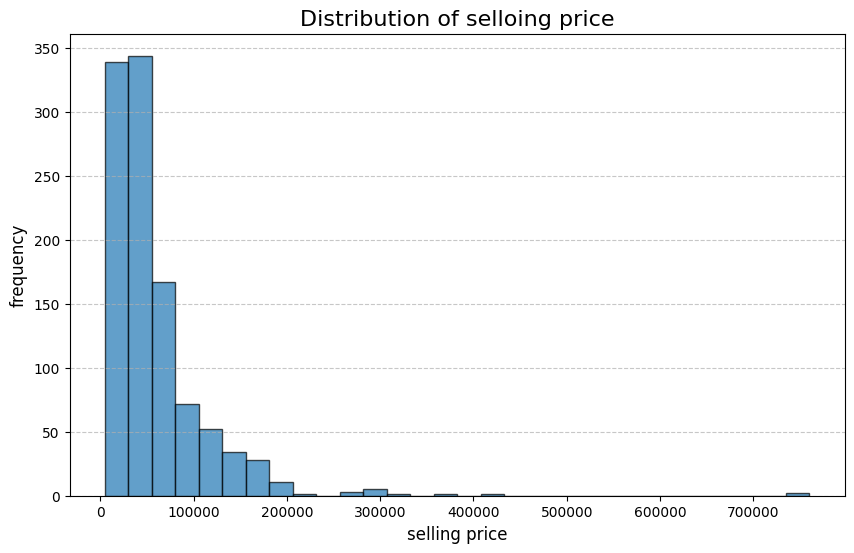

In [ ]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/BIKE DETAILS.csv')
plt.figure(figsize=(10,6))
plt.hist(df['selling_price'].dropna(), bins=30 , edgecolor='black' , alpha=0.7)
plt.title('Distribution of selloing price' , fontsize = 16)
plt.xlabel('selling price' , fontsize = 12)
plt.ylabel('frequency' , fontsize = 12)
plt.grid(axis = 'y' , linestyle = '--' , alpha=0.7)
plt.show()


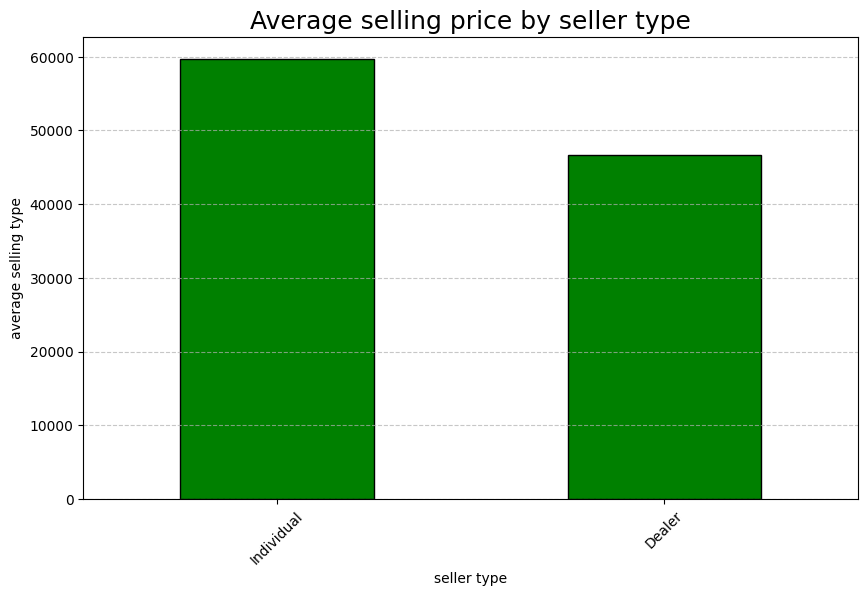

In [ ]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/BIKE DETAILS.csv')
avg_selling_price = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending = False)
plt.figure(figsize = (10,6))
avg_selling_price.plot(kind='bar', color='green', edgecolor='black')

plt.title('Average selling price by seller type',fontsize=18)
plt.xlabel('seller type',fontsize=10)
plt.ylabel('average selling type',fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis = 'y' , linestyle = '--' , alpha=0.7)
plt.show()

**Bikes sold by Dealer have a higher average selling price compared to those sold by Individual sellers, possibly due to better bike condition, warranty, or additional services offered**

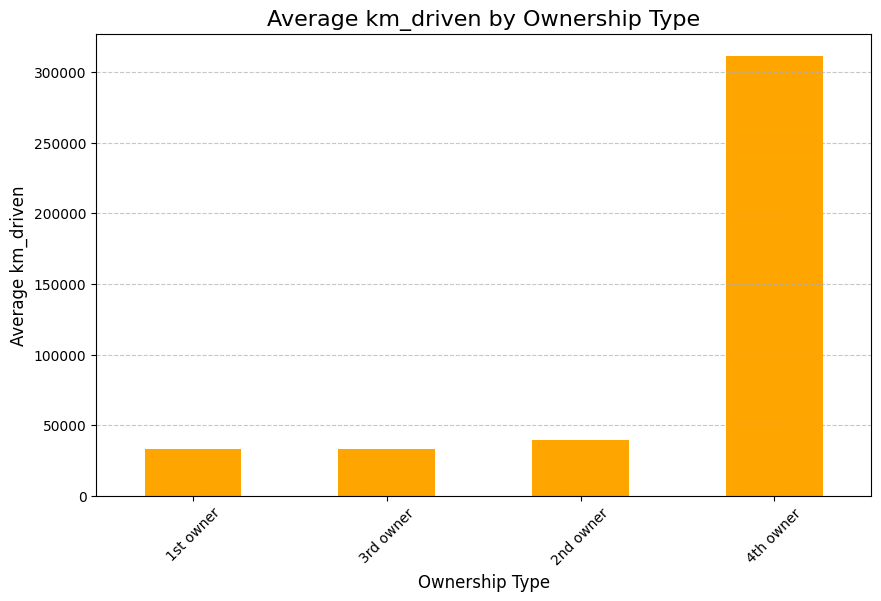

In [ ]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/BIKE DETAILS.csv')
avg_km = df.groupby('owner')['km_driven'].mean()
avg_km = avg_km.sort_values()
plt.figure(figsize = (10,6))
avg_km.plot(kind='bar',color = 'orange')
plt.title("Average km_driven by Ownership Type", fontsize=16)
plt.xlabel("Ownership Type", fontsize=12)
plt.ylabel("Average km_driven", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()



In [8]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
df['km_driven'].dtypes

print('Befor removing outliers:')
print(df["km_driven"].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("\n after removing outliers:")
print(df_clean["km_driven"].describe())

Befor removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

 after removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


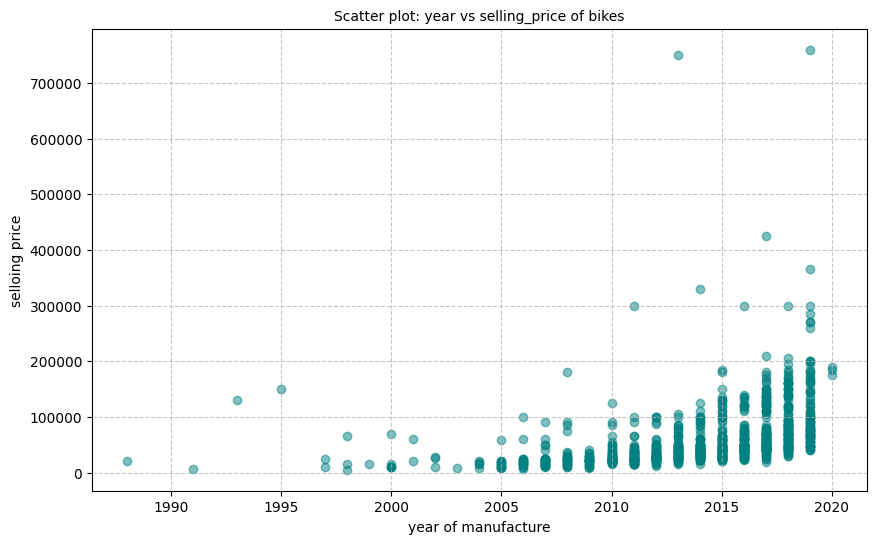

In [13]:
# question7:Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/BIKE DETAILS.csv')

plt.figure(figsize=(10,6))
plt.scatter(df["year"] , df["selling_price"], alpha=0.5 , color='teal')

plt.title("Scatter plot: year vs selling_price of bikes", fontsize='10')
plt.xlabel("year of manufacture", fontsize=10)
plt.ylabel("selloing price",fontsize=10)
plt.grid(True , linestyle="--",alpha=0.7)

plt.show()

In [15]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
df_encoded = pd.get_dummies(df,columns=["seller_type"], drop_first=False)
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


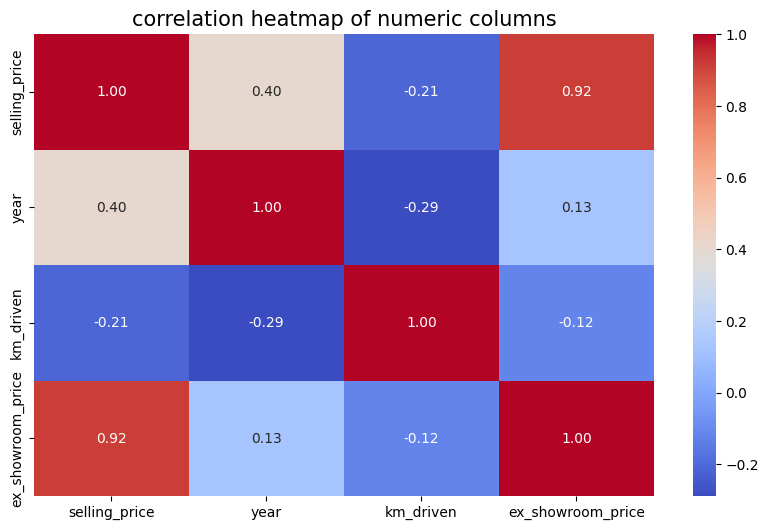

In [18]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/BIKE DETAILS.csv')

numeric_df = df.select_dtypes(include = ["int64","float64"])
corr = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True , cmap='coolwarm' , fmt = '.2f', cbar=True)
plt.title("correlation heatmap of numeric columns",fontsize=15)
plt.show()

Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

> Key Factors Affecting Selling Price

 1. Year of Manufacture
- Newer bikes (closer to 2020) sell at much higher prices.
- Strong positive correlation between year and selling_price.

2. Kilometers Driven (km_driven)
- More kilometers → lower resale value.
- Very high km values (above ~2 lakh) drag the average down and act as outliers.

3. Ownership (owner)
- 1st owner bikes are the most valuable (highest average selling price).
- 2nd, 3rd, 4th+ owners show a clear decrease in price with each transfer.

4. Seller Type (seller_type)
- Almost all sellers are "Individual" (1055 out of 1061).
- Very few "Dealer" entries, but those tend to list slightly higher prices.

5. Ex-Showroom Price
- Where available, it correlates positively with selling price.
- Missing for ~40% of rows, limiting its usefulness.


> Data Cleaning Performed

1. Converted Data Types
- Ensured km_driven, year, and selling_price are numeric.

2. Outlier Removal
- Used the IQR method on km_driven. Removed extreme values (e.g., bikes with 8.8 lakh km driven).

3. Missing Values
- ex_showroom_price had ~40% missing values → either dropped in some analyses or filled with median depending on use case.

4. Categorical Encoding
- seller_type was transformed into numeric using one-hot encoding.
- owner categories were retained as categorical but also used in group-based summaries.